<a href="https://colab.research.google.com/github/rbpernas/Learning_Projects/blob/main/House_prices_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main goal
In this notebook I'll analyze the most significative features of the Kaggle dataset to visualize the relationship between this features and the prices.
The features we are going to analize, as our first Random Forest prediction suggest (NUM AS ROOT priority) are:


*   OverallQual
*   ExterQual
*   Neigborhood
*   GarageCars
*   YearBuilt
*   BsmtQual
*   TotalBsmtSF
*   GrLivArea

Notice that, since we are restricting our analysis to these variables, we are unlikely to achieve the same accuracy as on the first attempt, when we obtained a 0.14553 RMSE value. As I know is difficult (maybe impossible), I'm aiming to improve this score with the few parameters we left.

# Import libraries and dataset

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv')
display(df_train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Delete values

In [40]:
columns_to_keep = [
    'SalePrice',
    'OverallQual',
    'ExterQual',
    'Neighborhood',
    'GarageCars',
    'YearBuilt',
    'BsmtQual',
    'TotalBsmtSF',
    'GrLivArea'
]

df_train = df_train[columns_to_keep]
display(df_train.head())

,SalePrice,OverallQual,ExterQual,Neighborhood,GarageCars,YearBuilt,BsmtQual,TotalBsmtSF,GrLivArea
0,208500,7,Gd,CollgCr,2,2003,Gd,856,1710
1,181500,6,TA,Veenker,2,1976,Gd,1262,1262
2,223500,7,Gd,CollgCr,2,2001,Gd,920,1786
3,140000,7,TA,Crawfor,3,1915,TA,756,1717
4,250000,8,Gd,NoRidge,3,2000,Gd,1145,2198


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   ExterQual     1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   GarageCars    1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   BsmtQual      1423 non-null   object
 7   TotalBsmtSF   1460 non-null   int64 
 8   GrLivArea     1460 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 102.8+ KB


The only feature with null values ​​is BsmtQual, so we'll have to check it.

# Analysis of the data

Split the dataset into numeric and sting data


In [42]:
list(set(df_train.dtypes.tolist()))


[dtype('int64'), dtype('O')]

In [43]:
df_num = df_train.select_dtypes(include = ['int64'])
df_num.head()

,SalePrice,OverallQual,GarageCars,YearBuilt,TotalBsmtSF,GrLivArea
0,208500,7,2,2003,856,1710
1,181500,6,2,1976,1262,1262
2,223500,7,2,2001,920,1786
3,140000,7,3,1915,756,1717
4,250000,8,3,2000,1145,2198


In [44]:
df_obj = df_train.select_dtypes(include = ['object'])
df_obj = pd.concat([df_train['SalePrice'], df_obj], axis=1)
display(df_obj.head())

,SalePrice,ExterQual,Neighborhood,BsmtQual
0,208500,Gd,CollgCr,Gd
1,181500,TA,Veenker,Gd
2,223500,Gd,CollgCr,Gd
3,140000,TA,Crawfor,TA
4,250000,Gd,NoRidge,Gd


## Numerical data

In [45]:
df_num.describe()

,SalePrice,OverallQual,GarageCars,YearBuilt,TotalBsmtSF,GrLivArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1.767123,1971.267808,1057.429452,1515.463699
std,79442.502883,1.382997,0.747315,30.202904,438.705324,525.480383
min,34900.000000,1.000000,0.000000,1872.000000,0.000000,334.000000
25%,129975.000000,5.000000,1.000000,1954.000000,795.750000,1129.500000
50%,163000.000000,6.000000,2.000000,1973.000000,991.500000,1464.000000
75%,214000.000000,7.000000,2.000000,2000.000000,1298.250000,1776.750000
max,755000.000000,10.000000,4.000000,2010.000000,6110.000000,5642.000000


array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'GrLivArea'}>]], dtype=object)

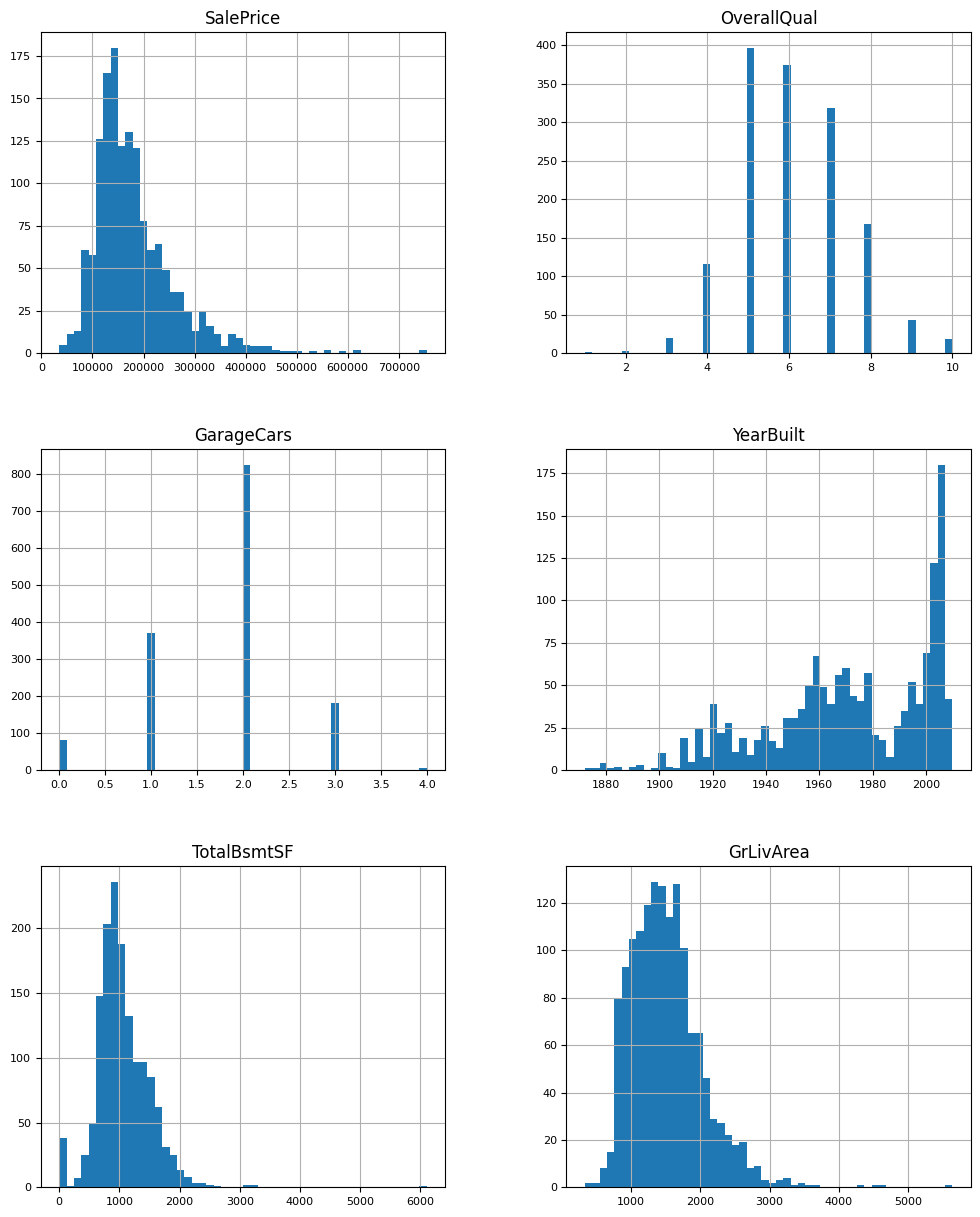

In [46]:
df_num.hist(figsize=(12, 15), bins=50, xlabelsize=8, ylabelsize=8)

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='YearBuilt', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GarageCars'>,
        <Axes: xlabel='OverallQual', ylabel='GarageCars'>,
        <Axes: xlabel='GarageCars', ylabel='GarageCars'>,
        <Axes: xlabel='YearBuilt', ylabel='GarageCars'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GarageCars'>,
        <Axes:

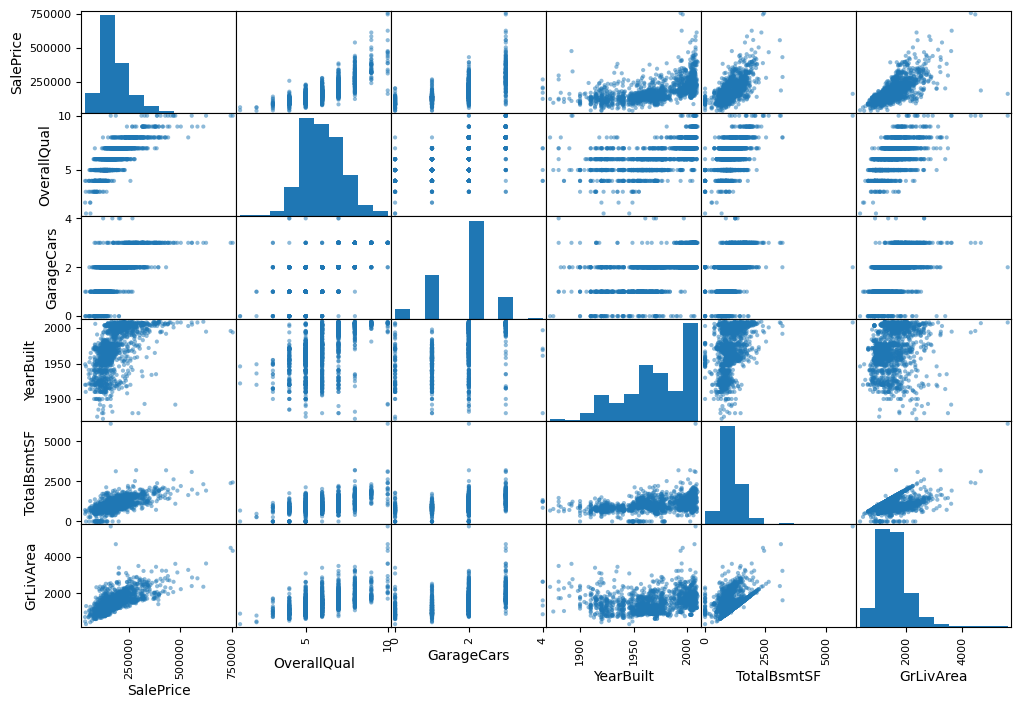

In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_num, figsize=(12, 8))

Look for correlations


In [48]:
corr_matrix = df_num.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
TotalBsmtSF,0.613581
YearBuilt,0.522897


As we can see, the correlations are pretty strong, witch means that every single feature have influence in the price.


## Categorical atributes


To discern which type of coding is most appropriate for each feature, we will analyze each one individually.

In [49]:
display(df_obj.head())

,SalePrice,ExterQual,Neighborhood,BsmtQual
0,208500,Gd,CollgCr,Gd
1,181500,TA,Veenker,Gd
2,223500,Gd,CollgCr,Gd
3,140000,TA,Crawfor,TA
4,250000,Gd,NoRidge,Gd


### ExterQual

For the documentation:

ExterQual: Evaluates the quality of the material on the exterior


       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

#### Define Category Order

##### Subtask:
Define the correct ordinal order for the 'ExterQual' categories (e.g., 'Po', 'Fa', 'TA', 'Gd', 'Ex').



**Reasoning**:
To define the ordinal order for 'ExterQual' categories, I will create a Python list named `exter_qual_order` with the specified values in ascending order.



In [50]:
exter_qual_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
print(f"Defined ExterQual order: {exter_qual_order}")

Defined ExterQual order: ['Po', 'Fa', 'TA', 'Gd', 'Ex']


**Reasoning**:
Now that the ordinal order for 'ExterQual' is defined, I will convert the 'ExterQual' column in `df_obj` to a categorical data type using this specified order. This will ensure that the categories are treated as ordered in subsequent operations, like plotting.



In [51]:
df_obj['ExterQual'] = pd.Categorical(df_obj['ExterQual'], categories=exter_qual_order, ordered=True)
print("ExterQual column converted to ordered categorical type.")

ExterQual column converted to ordered categorical type.


**Reasoning**:
With the 'ExterQual' column in `df_obj` now correctly ordered as a categorical type, I will re-create the box plot to visualize the 'SalePrice' distribution by 'ExterQual', ensuring the categories are displayed in the specified ordinal sequence.



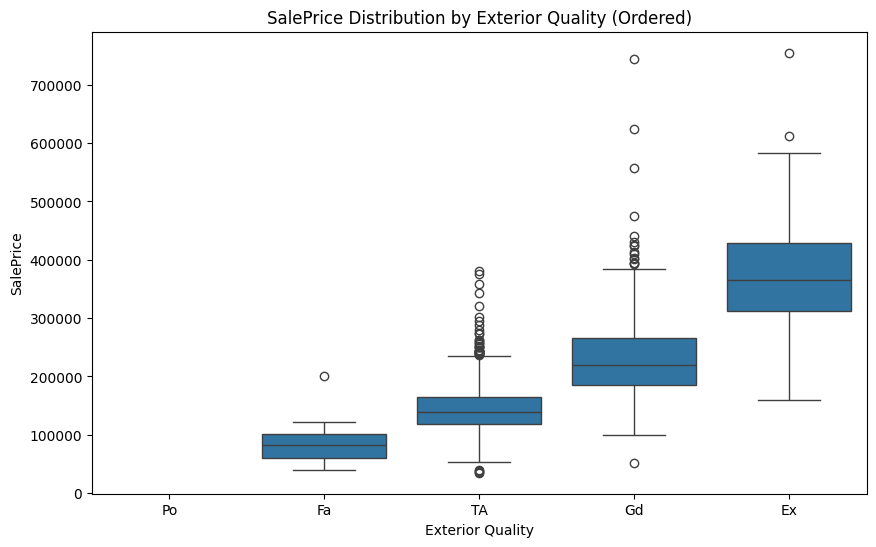

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=df_obj)
plt.title('SalePrice Distribution by Exterior Quality (Ordered)')
plt.xlabel('Exterior Quality')
plt.ylabel('SalePrice')
plt.show()

Seems that is calling to a label encoding, since the sale price is clearly related with the exterior quality



### Neighborhood

Physical locations within Ames city limits

    Blmngtn	Bloomington Heights
    Blueste	Bluestem
    BrDale	Briardale
    BrkSide	Brookside
    ClearCr	Clear Creek
    CollgCr	College Creek
    Crawfor	Crawford
    Edwards	Edwards
    Gilbert	Gilbert
    IDOTRR	Iowa DOT and Rail Road
    MeadowV	Meadow Village
    Mitchel	Mitchell
    Names	North Ames
    NoRidge	Northridge
    NPkVill	Northpark Villa
    NridgHt	Northridge Heights
    NWAmes	Northwest Ames
    OldTown	Old Town
    SWISU	South & West of Iowa State University
    Sawyer	Sawyer
    SawyerW	Sawyer West
    Somerst	Somerset
    StoneBr	Stone Brook
    Timber	Timberland
    Veenker	Veenker



First we're going to visualize the distribution of this value

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

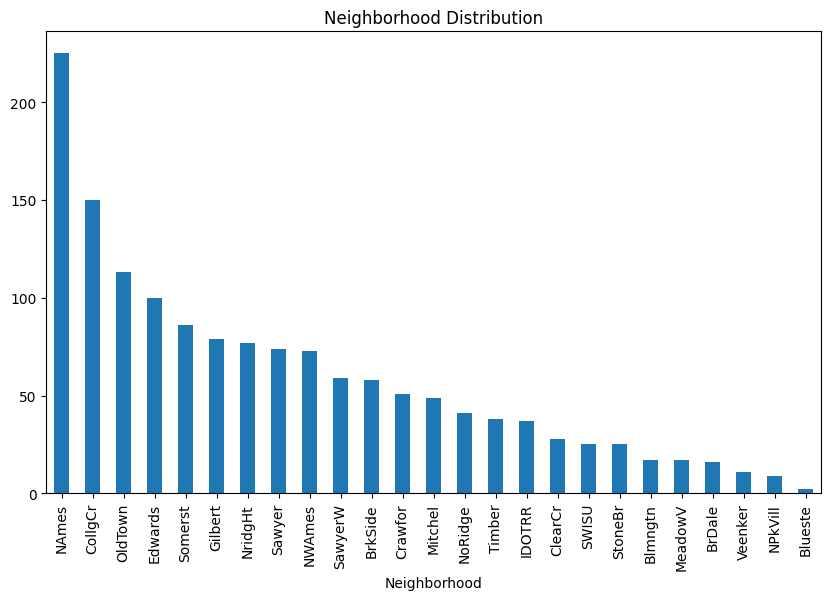

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
df_obj['Neighborhood'].value_counts().plot(kind='bar', ax=ax)
plt.title('Neighborhood Distribution')
plt

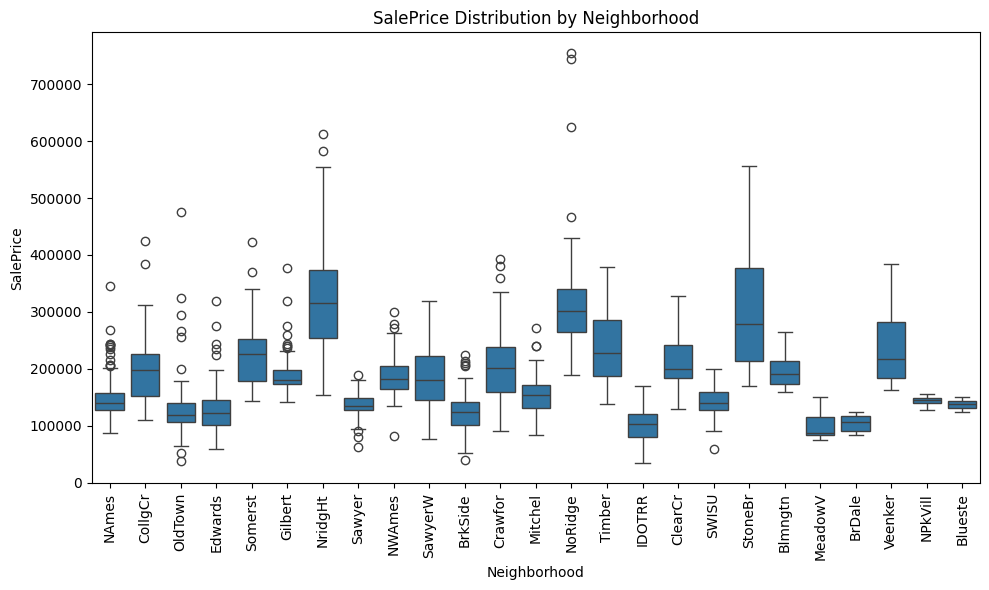

In [54]:
plt.figure(figsize=(10, 6))
neighborhood_order = df_obj['Neighborhood'].value_counts().index
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_obj, order=neighborhood_order)
plt.title('SalePrice Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

For this label seems that a one-hot encoding will perform better wen we will train our models, since is difficult to see nothing except the three most expensives neighborhoods (Northridge Heights, Northridge and Stone Brook)

### Basement quality

Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement



I'm going to reproduce the same steps as in the exterior quality

In [55]:
bsmt_qual_order = ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'] #Defining BsmtQual Order
df_obj['BsmtQual'] = pd.Categorical(df_obj['BsmtQual'], categories=bsmt_qual_order, ordered=True)
print("BsmtQual column converted to ordered categorical type.")

BsmtQual column converted to ordered categorical type.


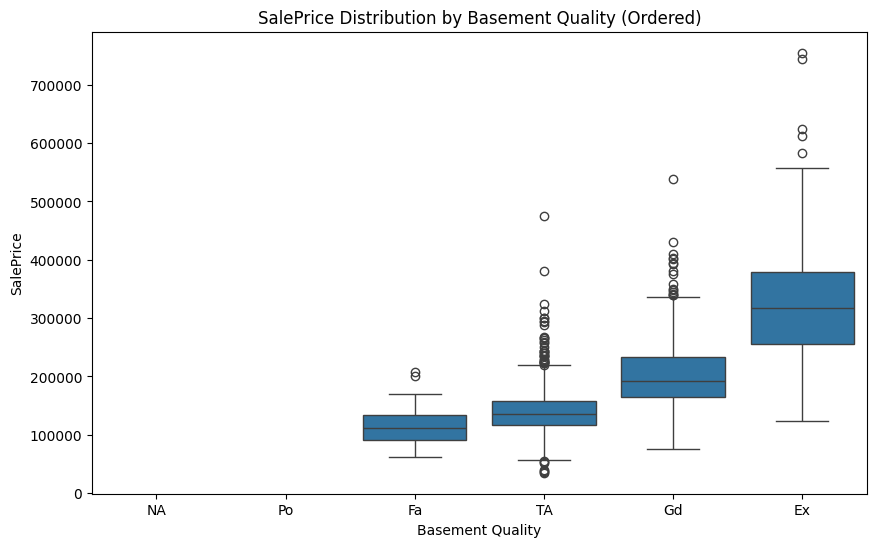

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtQual', y='SalePrice', data=df_obj)
plt.title('SalePrice Distribution by Basement Quality (Ordered)')
plt.xlabel('Basement Quality')
plt.ylabel('SalePrice')
plt.show()

If we remember, for this data we have some missing values (37 out of 1460) so we have to handle this.

In [57]:
df_obj['BsmtQual'] = df_obj['BsmtQual'].fillna('NA')
print("Missing values in 'BsmtQual' column filled with 'NA'.")

Missing values in 'BsmtQual' column filled with 'NA'.


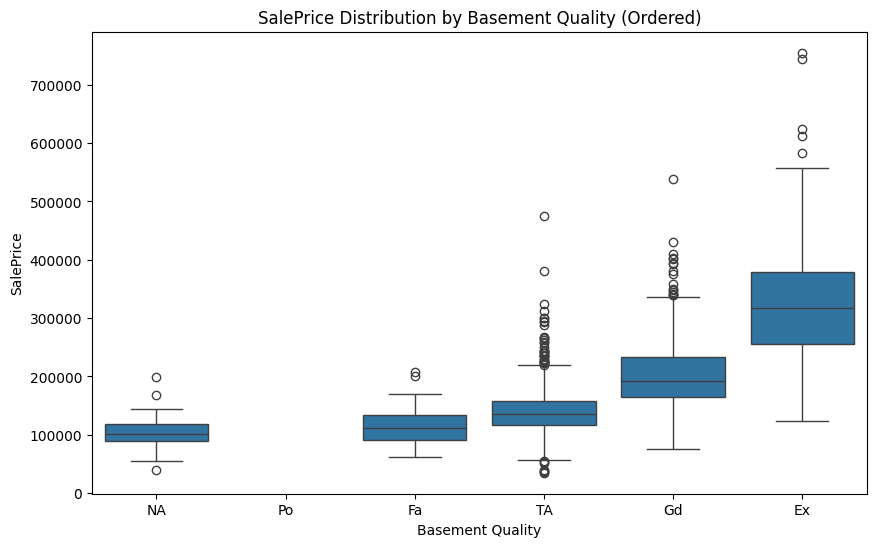

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtQual', y='SalePrice', data=df_obj)
plt.title('SalePrice Distribution by Basement Quality (Ordered)')
plt.xlabel('Basement Quality')
plt.ylabel('SalePrice')
plt.show()

Seems reasonable due to its relative agreement with the other values.

# Feature engineering

Before train our first predictive models (and establish a baseline) it's important to execute some basic feature engineering

## Handling categorical data

To train our model in a better way we're going to encode the categorical data.
Our encoding protocol is going to be:


*   ORDINAL ENCODING for 'ExterQual' and 'BsmtQual'
*   ONE-HOT ENCODING for 'Neighborhood'



In [59]:
#Same changes that we perform in our previous analisys

df_train['ExterQual'] = pd.Categorical(df_train['ExterQual'], categories=exter_qual_order, ordered=True)
df_train['BsmtQual'] = pd.Categorical(df_train['BsmtQual'], categories=bsmt_qual_order, ordered=True)
df_train['BsmtQual'] = df_train['BsmtQual'].fillna('NA')

df_train_encoded = df_train.copy()

In [60]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder(categories=[exter_qual_order, bsmt_qual_order])
encoded_values = ordinal_encoder.fit_transform(df_train_encoded[['ExterQual', 'BsmtQual']])



In [61]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_neighborhood = one_hot_encoder.fit_transform(df_train_encoded[['Neighborhood']])



In [62]:
df_train_encoded['ExterQual_encoded'] = encoded_values[:, 0]
df_train_encoded['BsmtQual_encoded'] = encoded_values[:, 1]
df_train_encoded = df_train_encoded.drop(columns=['ExterQual', 'BsmtQual'])



# Create a DataFrame from the one-hot encoded output
neighborhood_df = pd.DataFrame(encoded_neighborhood, columns=one_hot_encoder.get_feature_names_out(['Neighborhood']))

# Concatenate the one-hot encoded DataFrame with df_train_encoded and drop the original 'Neighborhood' column
df_train_encoded = pd.concat([df_train_encoded.reset_index(drop=True), neighborhood_df], axis=1)
df_train_encoded = df_train_encoded.drop(columns=['Neighborhood'])

display(df_train_encoded.head())

,SalePrice,OverallQual,GarageCars,YearBuilt,TotalBsmtSF,GrLivArea,ExterQual_encoded,BsmtQual_encoded,Neighborhood_Blmngtn,Neighborhood_Blueste,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,208500,7,2,2003,856,1710,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,181500,6,2,1976,1262,1262,2.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,223500,7,2,2001,920,1786,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,140000,7,3,1915,756,1717,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,250000,8,3,2000,1145,2198,3.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
corr_matrix = df_train_encoded.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExterQual_encoded,0.682639
GarageCars,0.640409
TotalBsmtSF,0.613581
BsmtQual_encoded,0.585207
YearBuilt,0.522897
Neighborhood_NridgHt,0.402149
Neighborhood_NoRidge,0.330424


## Feature scaling

For 'GrLivArea' and 'TotalBsmtSF' we're going to take the logarithm of the values, since there are values far rom the center

In [68]:
from sklearn.preprocessing import FunctionTransformer

log_transformer= FunctionTransformer(np.log, inverse_func=np.exp)
log_GrLiv = log_transformer.transform(df_train_encoded[['GrLivArea']])
log_BsmtSF = log_transformer.transform(df_train_encoded[['TotalBsmtSF']])
df_train_encoded['GrLivArea_log'] = log_GrLiv
df_train_encoded['TotalBsmtSF_log'] = log_BsmtSF



/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


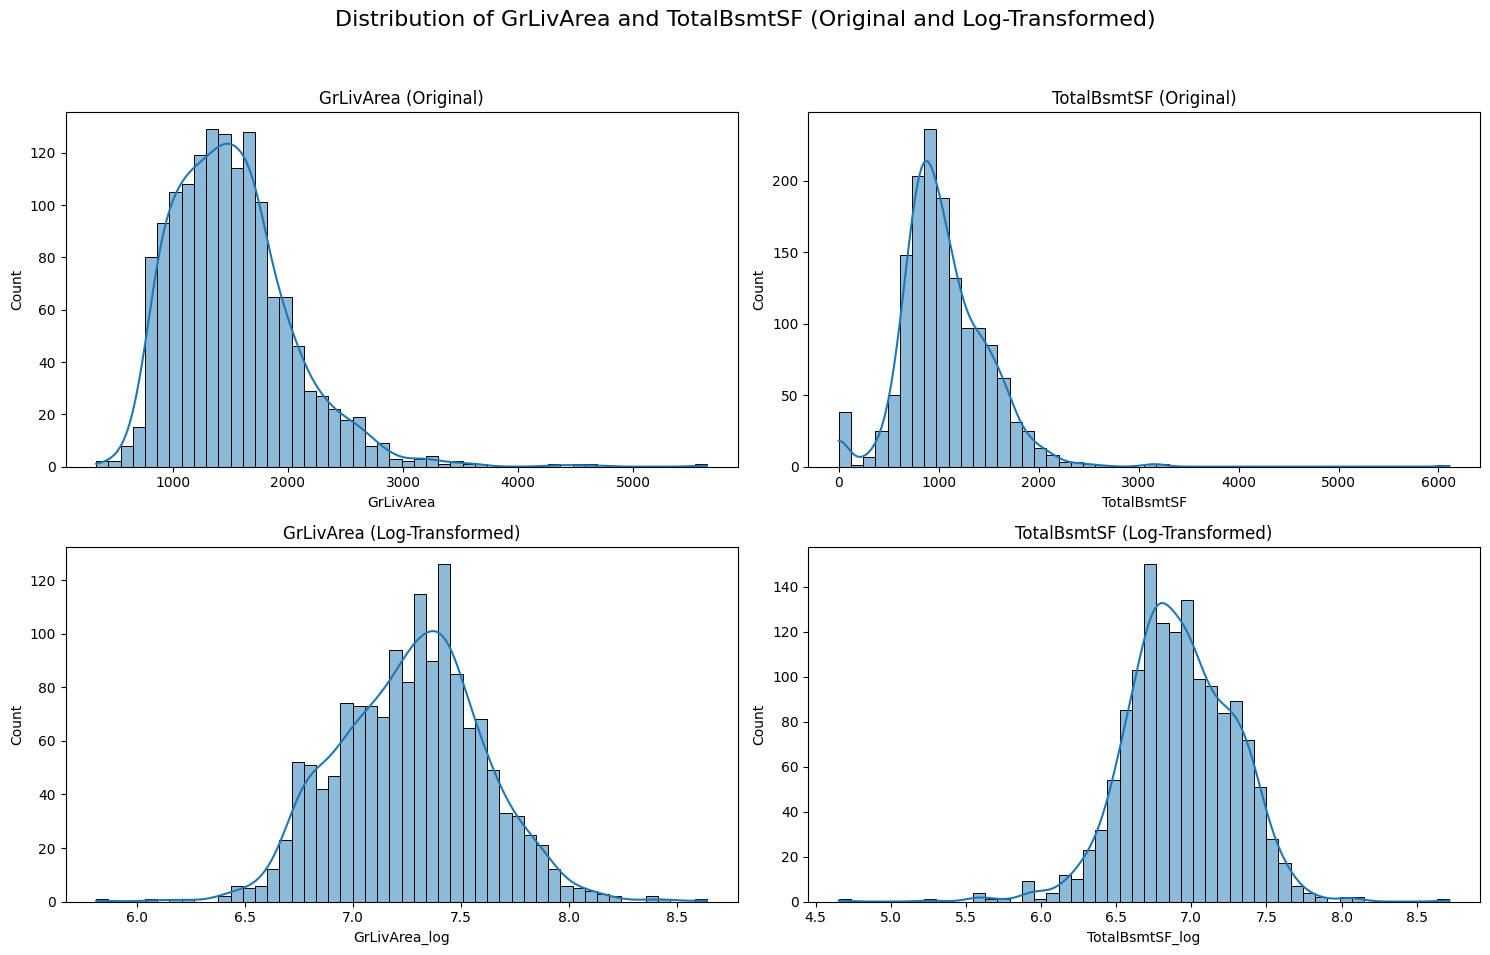

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of GrLivArea and TotalBsmtSF (Original and Log-Transformed)', fontsize=16)

sns.histplot(df_train_encoded['GrLivArea'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('GrLivArea (Original)')

sns.histplot(df_train_encoded['TotalBsmtSF'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('TotalBsmtSF (Original)')

sns.histplot(df_train_encoded['GrLivArea_log'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('GrLivArea (Log-Transformed)')

sns.histplot(df_train_encoded['TotalBsmtSF_log'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('TotalBsmtSF (Log-Transformed)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

They seem much more Gaussian (better tot train the model)

Now we're coing to apply standarization to